In [109]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
np.set_printoptions(threshold=np.inf)

In [111]:
wm_image = cv2.imread('Images\WM.png', cv2.IMREAD_GRAYSCALE)
input_image = cv2.imread('Images\InputImage.png')

In [112]:
_, wm_binary = cv2.threshold(wm_image,165, 255, cv2.THRESH_BINARY)

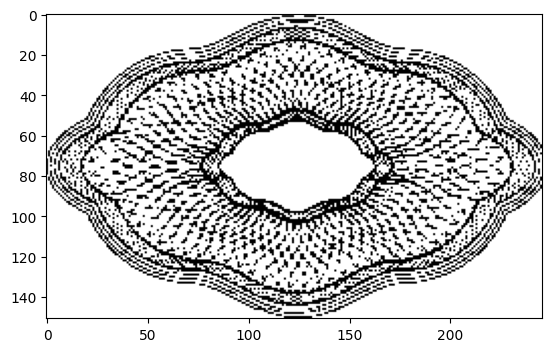

In [113]:
plt.imshow(wm_binary, cmap='gray')

In [114]:
wm_binary = wm_binary & 1
r, g, b = cv2.split(input_image)


In [115]:
# what bit to change: 1 less important, 8 most important
n = 1
# Bit demonstration of int8 values
b_unpacked = np.unpackbits(b[:,:,np.newaxis], axis=2)
# Changing bits
b_unpacked[:,:, -n] = wm_binary[:, :]
# Change bit demonstration aagain to int8
b_packed = np.packbits(b_unpacked, axis=2)
b_new = b_packed.reshape(b_packed.shape[0],b_packed.shape[1])
# Making new image
modified_image = cv2.merge((r, g, b_new))

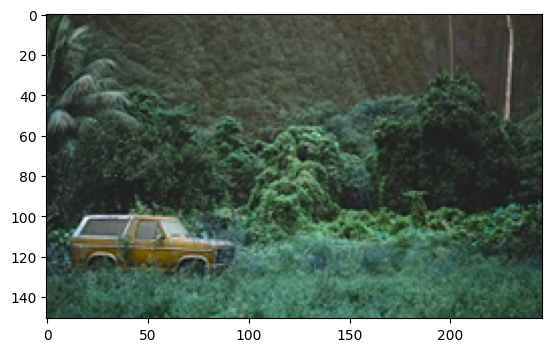

In [116]:
plt.imshow(modified_image)

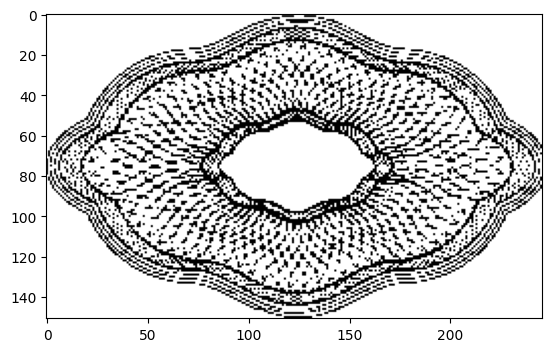

In [117]:
_, _, b_mod = cv2.split(modified_image)
b_mod_unpacked = np.unpackbits(b_mod[:,:,np.newaxis], axis=2)
wm_from_im = b_mod_unpacked[:,:, -n]
plt.imshow(wm_from_im, cmap='gray')

In [126]:
def update_wm(image, h, w):
    duplicated_image = np.concatenate((image, image), axis=1)
    duplicated_image = np.concatenate((duplicated_image, duplicated_image), axis=0)
    duplicated_image = duplicated_image[:h, :w]
    return duplicated_image


In [127]:
def insert_wm(container, bit, wm):
    wm = wm & 1
    r, g, b = cv2.split(containe)
    # Bit demonstration of int8 values
    b_unpacked = np.unpackbits(b[:,:,np.newaxis], axis=2)
    # Changing bits
    b_unpacked[:,:, -bit] = wm[:, :]
    # Change bit demonstration to int8
    b_packed = np.packbits(b_unpacked, axis=2)
    b_new = b_packed.reshape(b_packed.shape[0],b_packed.shape[1])
    # Making new image
    modified_image = cv2.merge((r, g, b_new))
    return modified_image